In [3]:
import numpy as np
from  matplotlib import pyplot as plt


In [4]:
class spectrum(object):

    def __init__(self, energy, flux, par = None):
        self.energy_grid = energy
        self.flux = flux
        self.param = par
    
    # def from_reltrans()


def log_energy_grid(Emin, Emax, ne):

    energy = np.logspace(np.log10(Emin), np.log10(Emax), ne, dtype = np.float32)

    return energy


In [15]:
Emin = 0.1
Emax = 200.0
ne = 1001

ear = log_energy_grid(Emin, Emax, ne)


In [16]:
parameters = np.genfromtxt('./Benchmarks/xrb/ip_0,12_0,25.dat')
parameters

array([ 2.97014e+01,  5.00000e-01,  4.42792e+01, -1.00000e+00,
        1.00000e+03,  0.00000e+00,  1.79279e+00,  1.44735e+00,
        1.00000e+00,  1.99874e+01,  6.00000e+01,  0.00000e+00,
        1.00000e+00,  1.00000e+01,  1.22070e-01,  2.44140e-01,
        4.00000e+00, -1.66535e-02, -6.86551e-01,  1.52280e-01,
        1.00000e+00])

In [17]:
data = np.genfromtxt('./Benchmarks/xrb/Spec/Total.dat')

In [18]:
# len(data[:,0]), data[0,0], data[-1,0]
energy_spectrum = spectrum(data[:,0], data[:,1])

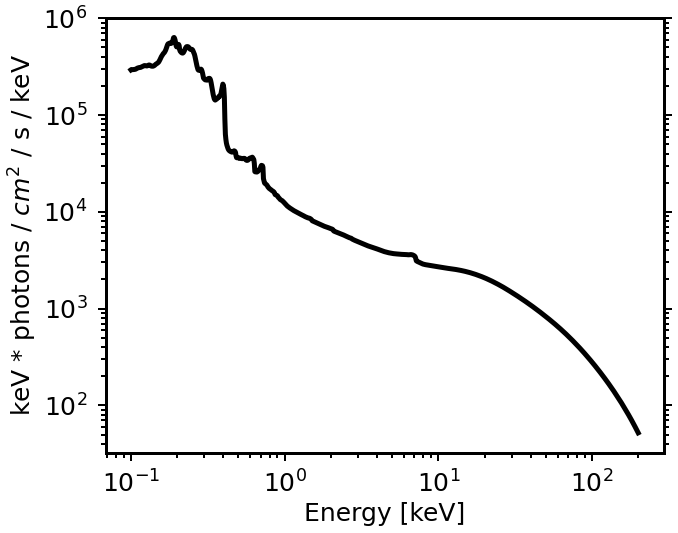

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
font = 20 

E = (ear[1:] + ear[:-1]) * 0.5 
dE = (ear[1:] - ear[:-1]) * 0.5 

ax.plot(energy_spectrum.energy_grid, energy_spectrum.flux/dE * E**2, lw = 5, color = 'k', label = 'reltrans spectrum')

# ax.plot(data[:,0], data[:,1]/dE * E**2, lw = 5, color = 'k', label = 'reltrans spectrum')


font = 25
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'keV * photons / $cm^2$ / s / keV ', fontsize = font )
ax.set_xlabel(r'Energy [keV]', fontsize = font )
ax.tick_params(which='major', width=2, length=8, labelsize = font, pad=10)
ax.tick_params(which='minor', width=2, length=5, labelsize = font, pad=10)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.yaxis.set_ticks_position('both')